#Seasonal Exponential Time Smoothening MODEL


Exponential smoothing is a method for forecasting univariate time series data. It is based on the principle that a prediction is a weighted linear sum of past observations or lags. The Exponential Smoothing time series method works by assigning exponentially decreasing weights for past observations.

Here We have applied Seasonal ETS model with monthly seasonality on Nizamabad District univariate AQI data provided by NASSCOM.


In [257]:
## Included all necessary Header files
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [258]:
#Preprocessing the data

df = pd.read_excel("AQI1.xlsx")

df.index = pd.to_datetime(df["Month"])
df.drop(columns="Month",inplace=True)

df['Nizamabad'] = pd.to_numeric(df['Nizamabad'],errors='coerce')

# EDA

In [259]:
print(df.dtypes)
print(df.isna().sum())

Nizamabad             float64
Adilabad               object
Kuda, warangal          int64
Mee-Seva, Warangal      int64
Khammam                object
Karimnagar              int64
dtype: object
Nizamabad             1
Adilabad              0
Kuda, warangal        0
Mee-Seva, Warangal    0
Khammam               0
Karimnagar            0
dtype: int64


<AxesSubplot:xlabel='Month'>

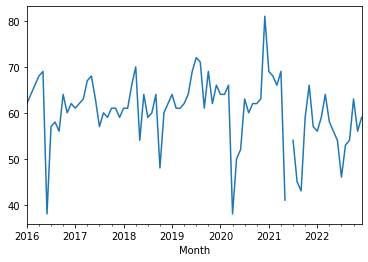

In [260]:
df["Nizamabad"].plot()

In [261]:
df['Nizamabad'] = df['Nizamabad'].interpolate(method="time")

<AxesSubplot:xlabel='Month'>

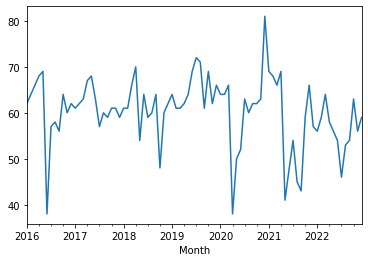

In [262]:
df["Nizamabad"].plot()

# MODEL

<ipython-input-266-d0277acef5da>:4: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit = sm.tsa.ExponentialSmoothing(ts_data, seasonal_periods=12, trend='add', seasonal='add', damped=True).fit()


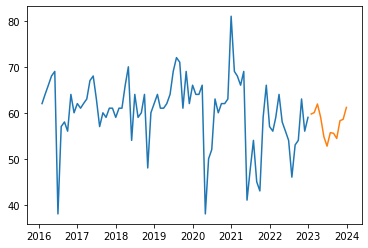

In [266]:
ts_data = pd.Series(df['Nizamabad'].values, index=pd.date_range(start='2016-01-01', periods=len(df), freq='M'))

# Fit the Seasonal ETS model
fit = sm.tsa.ExponentialSmoothing(ts_data, seasonal_periods=12, trend='add', seasonal='add', damped=True).fit()

# Generate forecasts for the next 12 months
forecasts = fit.forecast(12)

# Plot the forecasts
plt.plot(ts_data)
plt.plot(forecasts)
plt.show()

<ipython-input-264-77c001ac85ef>:4: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit = sm.tsa.ExponentialSmoothing(ts_data_prev, seasonal_periods=12, trend='add', seasonal='add', damped=True).fit()


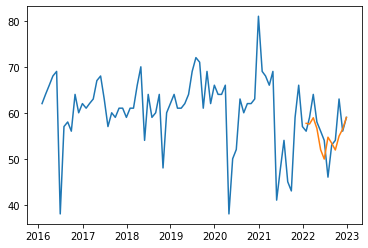

In [264]:
ts_data_prev = pd.Series(df['Nizamabad'].iloc[0:72].values, index=pd.date_range(start='2016-01-01', periods=72, freq='M'))

# Fit the Seasonal ETS model
fit = sm.tsa.ExponentialSmoothing(ts_data_prev, seasonal_periods=12, trend='add', seasonal='add', damped=True).fit()

# Generate forecasts for the next 12 months
forecasts = fit.forecast(12)

# Plot the forecasts
plt.plot(ts_data)
plt.plot(forecasts)
plt.show()

# ERROR CALCULATION

In [265]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from math import sqrt
rmse = round(sqrt(mean_squared_error(df["Nizamabad"].iloc[-12:],forecasts)),2)
mae = round(mean_absolute_error(df["Nizamabad"].iloc[-12:],forecasts),2)
mape = mean_absolute_percentage_error(df["Nizamabad"].iloc[-12:],forecasts)
print(f"RMSE : {rmse}")
print(f"MAE  : {mae}")
print(f"MAPE : {mape*100}%")

RMSE : 4.19
MAE  : 3.12
MAPE : 5.640130303765193%


The mean absolute percentage error is : 5.64%
Hence the model has acceptable accuracy of 94.36%

In [268]:
from pandas.tseries.offsets import DateOffset
pred_date=[df.index[-1]+ DateOffset(months=x)for x in range(1,13)]
pred_date=pd.DataFrame(index=pred_date,columns=df.columns)
df5 = pd.concat([df,pred_date])
df5["Nizamabad"][-12:]=forecasts
df_final = df5[["Nizamabad"]]

<ipython-input-268-f14253ab7302>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5["Nizamabad"][-12:]=forecasts


In [269]:
df_final.to_csv("Nizamabad_AQI_ETS.csv")